# Segunda Avaliação - Fase _Analyse_

## Parte 01

Renata trabalha como analista da qualidade em uma fábrica de sorvetes, pertencente a uma grande multinacional. Recentemente, ela recebeu um relatório do time comercial, com todas as vendas da última semana. Assim, ela ficou responsável por tratar os dados e chegar às conclusões pertinentes.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df1 = pd.read_excel('dados_2.xlsx', sheet_name='Fábrica de Sorvete - Vendas')
df2 = pd.read_excel('dados_2.xlsx', sheet_name='Fábrica de Sorvete - Adoçante')
df3 = pd.read_excel('dados_2.xlsx', sheet_name='Irmãos Tecnologia - Prazo')
df4 = pd.read_excel('dados_2.xlsx', sheet_name='Irmãos Tecnologia - Novo Prazo')

### 1) Renata criou uma série de gráficos e observou algo interessante. O quê foi descoberto? 

<span style="color:red"> Resp: Efeito de Pareto. </span>

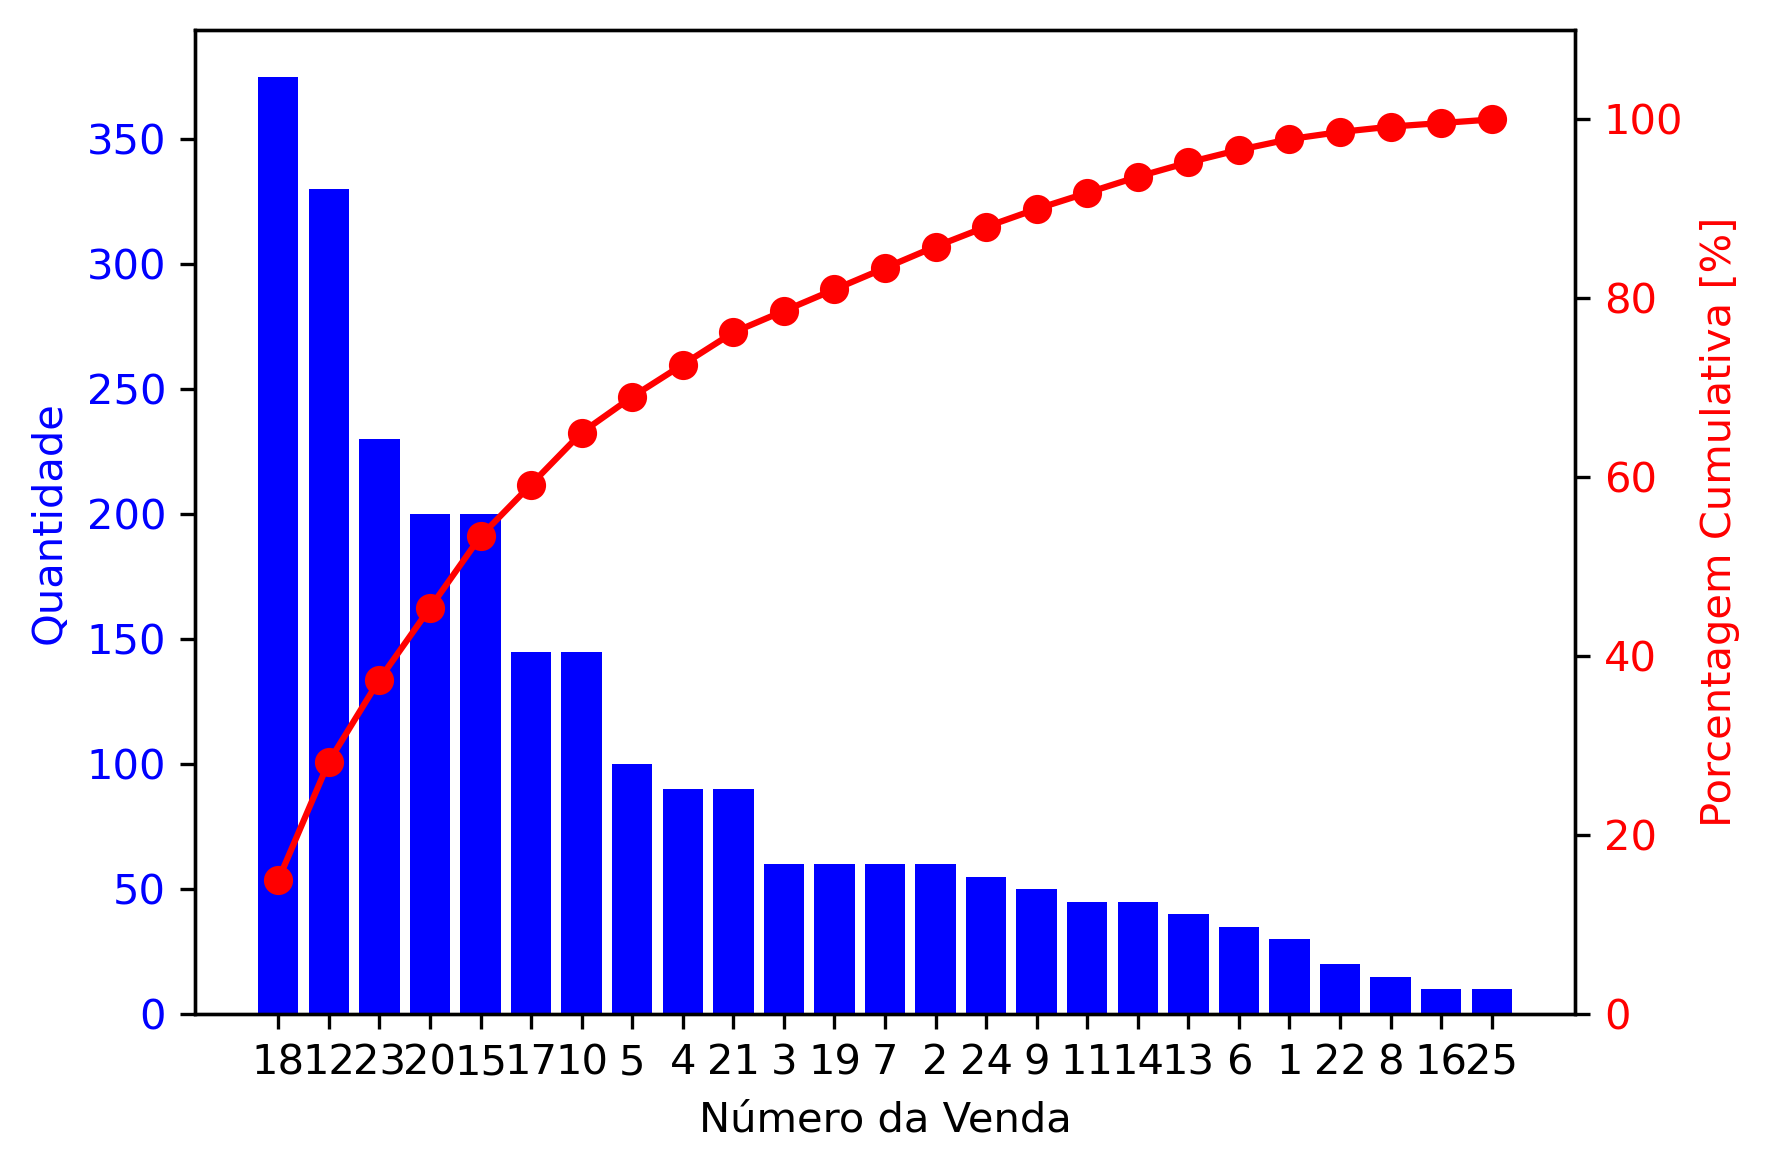

In [4]:
ordr = df1.groupby('Número da Venda').agg({
    'Quantidade': 'sum'}
).sort_values(by='Quantidade',
              ascending=False).squeeze()

per_ordr = ordr / ordr.sum() * 100
cum_ordr = np.cumsum(per_ordr)

xx = range(len(ordr))

fig, ax = plt.subplots(1, 1, dpi=300)

ax.bar(xx, ordr, color='b')
ax.set_xticks(xx, ordr.index)
ax.set_ylabel('Quantidade', color='b')
ax.tick_params(axis='y', labelcolor='b')

ax.set_xlabel('Número da Venda')

ax2 = ax.twinx()

ax2.plot(xx, cum_ordr, ls='-', marker='o', color='r')
ax2.set_ylabel('Porcentagem Cumulativa [%]', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(0, 110)

fig.tight_layout()


### 2) Renata também achou interessante entender quais eram os sabores mais populares. Assim, qual foi o terceiro sabor mais vendido? 

<span style="color:red"> Resp: Napolitano </span>

In [5]:
df1.groupby('Sabor').agg({
    'Quantidade': 'sum'}
).sort_values(by='Quantidade',
              ascending=False)

,Quantidade
Sabor,
CHOCOLATE,920
CREME,560
NAPOLITANO,520
FLOCOS,60
LIMÃO,55
MORANGO,55
COCO,50
DOCE DE LEITE,50
PASSAS,45


### 3) Outra necessidade era identificar a maior venda. Qual foi ela?

<span style="color:red"> Resp:  18. </span>

### 4) O sabor do sorvete é que tipo de variável?

<span style="color:red"> Resp: Categórica </span>

## Parte 02

O laboratório da fábrica estava testando diferentes tipos de adoçante: xilitol, dextrose e acessulfame. Para entender qual adoçava mais o sorvete, 10 amostras de sorvete para cada adoçante foram criadas, totalizando 30 amostras. Assim, as pessoas deveriam classificar o nível de doçura em uma escala de 0 a 10.

### 1) Qual é o adoçante que traz um maior nível de doçura, quando comparado aos demais?

<span style="color:red"> Resp: Acessulfame. </span>

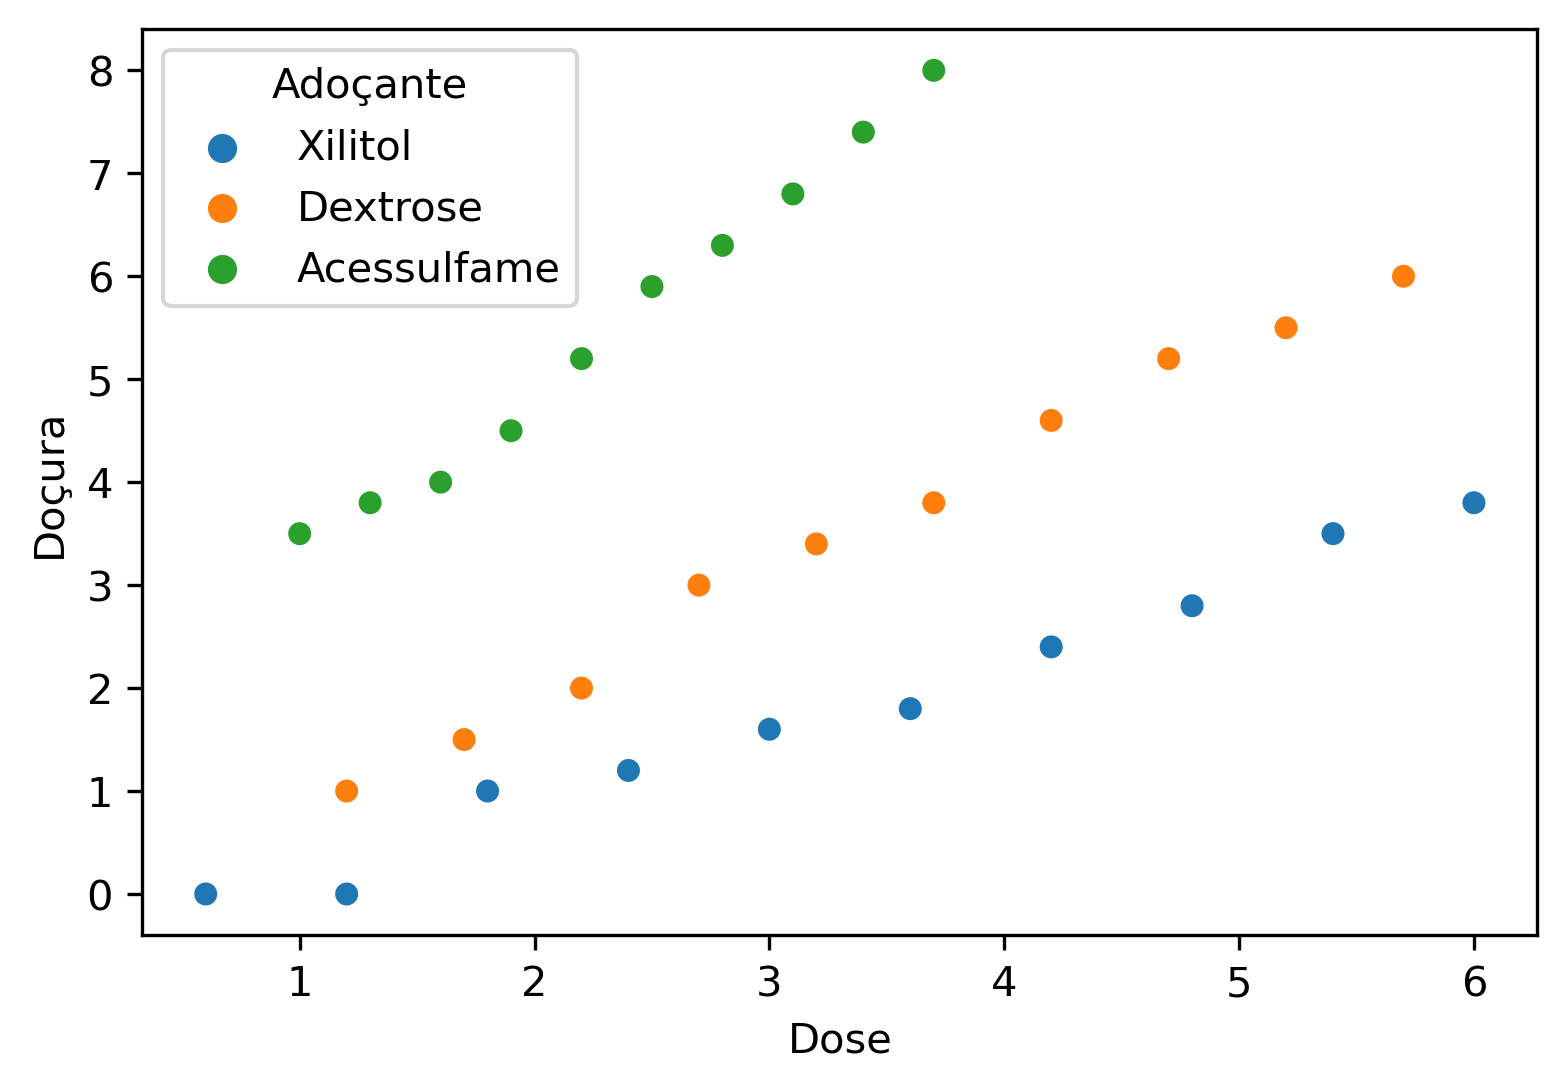

In [12]:
plt.figure(dpi=300)
sns.scatterplot(data=df2, x='Dose', y='Doçura', hue='Adoçante');

### 2) Para um sorvete de café foi decidido que seriam empregados aproximadamente 3,5 g de adoçante por 100 g de sorvete. Como o sorvete de café deve ter um nível de doçura médio, qual é o melhor adoçante para sua composição? 

<span style="color:red"> Resp: Dextrose. </span>

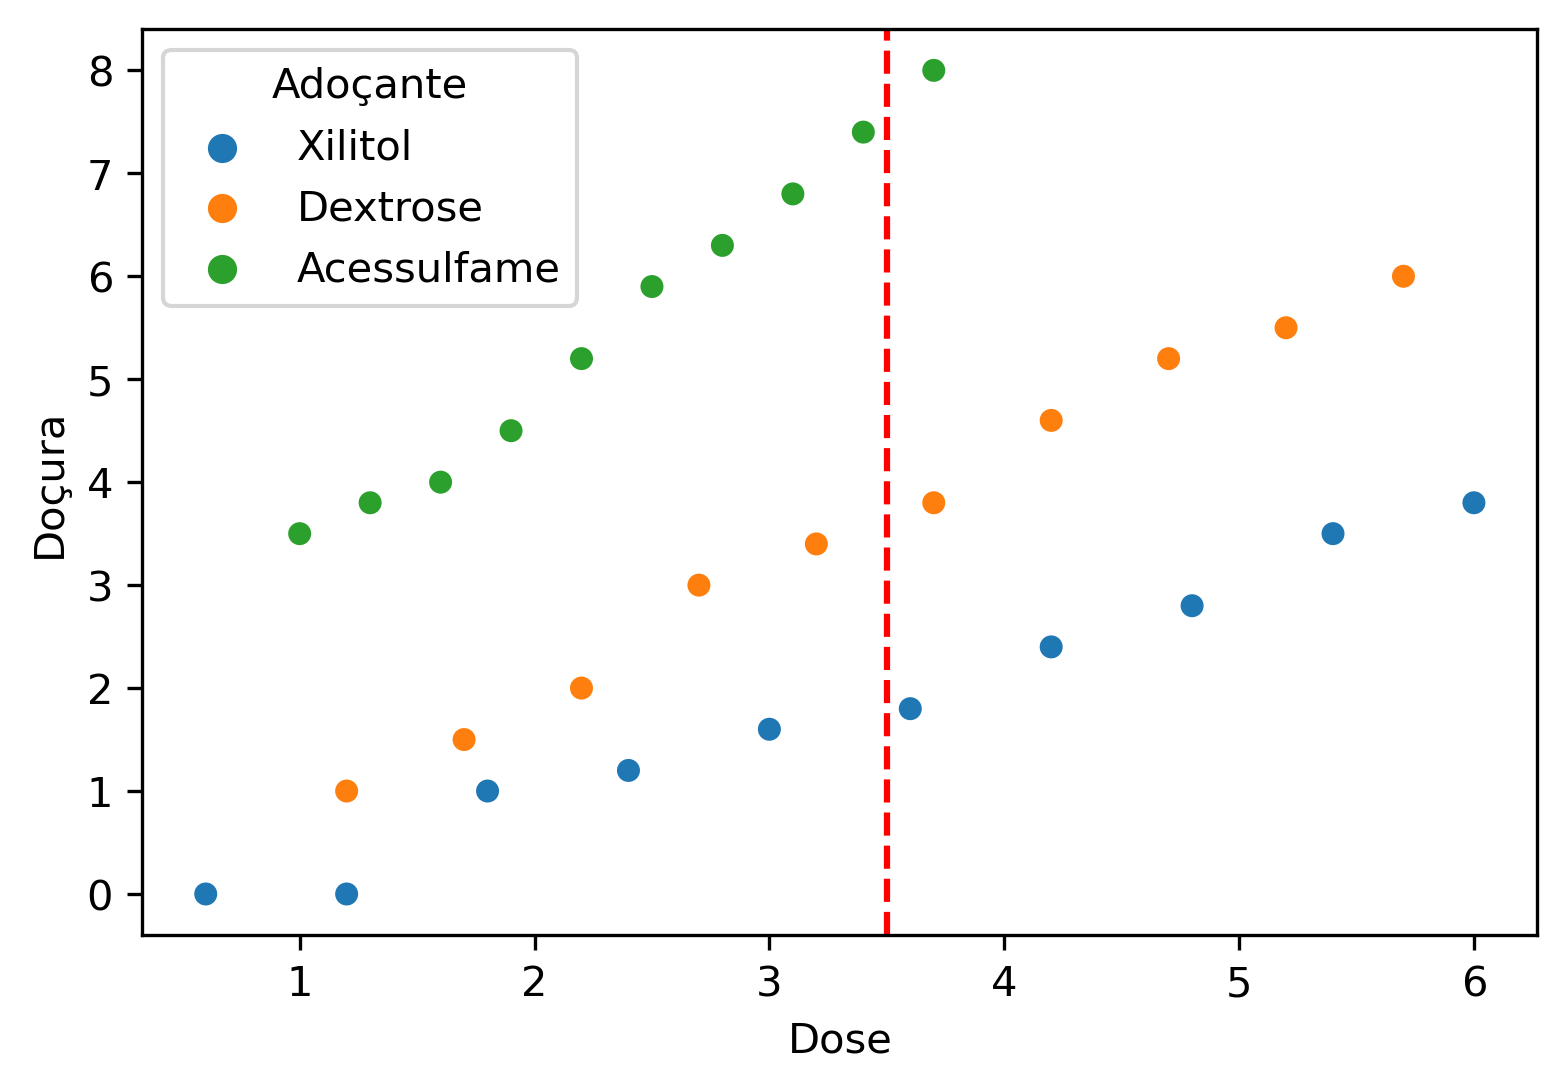

In [14]:
plt.figure(dpi=300)
sns.scatterplot(data=df2, x='Dose', y='Doçura', hue='Adoçante')
plt.axvline(3.5, ls='--', color='r');

### 3) Determinado sorvete precisa de um nível de doçura de pelo menos 3,5 na nota da escala. Sabendo que 1 grama do adoçante dextrose custa 1,5 vezes o preço de 1 grama do adoçante xilitol, e que 1 grama do adoçante acessulfame custa 5 vezes o preço de 1 grama do adoçante xilitol, qual é o melhor adoçante para esse sorvete?

<span style="color:red"> Resp: Dextrose. </span>

In [15]:
preco = {'Xilitol': 1,
         'Dextrose': 1.5,
         'Acessulfame': 5}

for p, v in preco.items():
    mask = df2['Adoçante'] == p
    df2_ = df2.loc[mask, :]
    m, n = np.polyfit(df2_['Dose'], df2_['Doçura'], 1)
    dose = (3.5 - n)/m
    print(f'Preço do {p} para 3.5 de Doçura: {dose * v:.3f} base do xilitol')


Preço do Xilitol para 3.5 de Doçura: 5.640 base do xilitol
Preço do Dextrose para 3.5 de Doçura: 5.044 base do xilitol
Preço do Acessulfame para 3.5 de Doçura: 5.865 base do xilitol


## Parte 03

Ao realizar a pesquisa, vários dos clientes reclamaram do prazo de entrega, que muitas vezes não era respeitado. Ainda mais, o prazo de entrega prometido pela Irmãos Tecnologia era um dos mais atraentes no mercado (e um fator de venda importante!), e por isso entregas feitas com atraso manchavam a imagem da empresa.

### 1) Sabendo que a meta é entregar todos os pedidos em até 5 dias, o que é possível dizer sobre o prazo de entrega?

<span style="color:red"> Resp: A maioria das entregas foi feita com atraso, sendo poucas dentro do prazo combinado. </span>

Percentagem de Atraso:  70.0 %


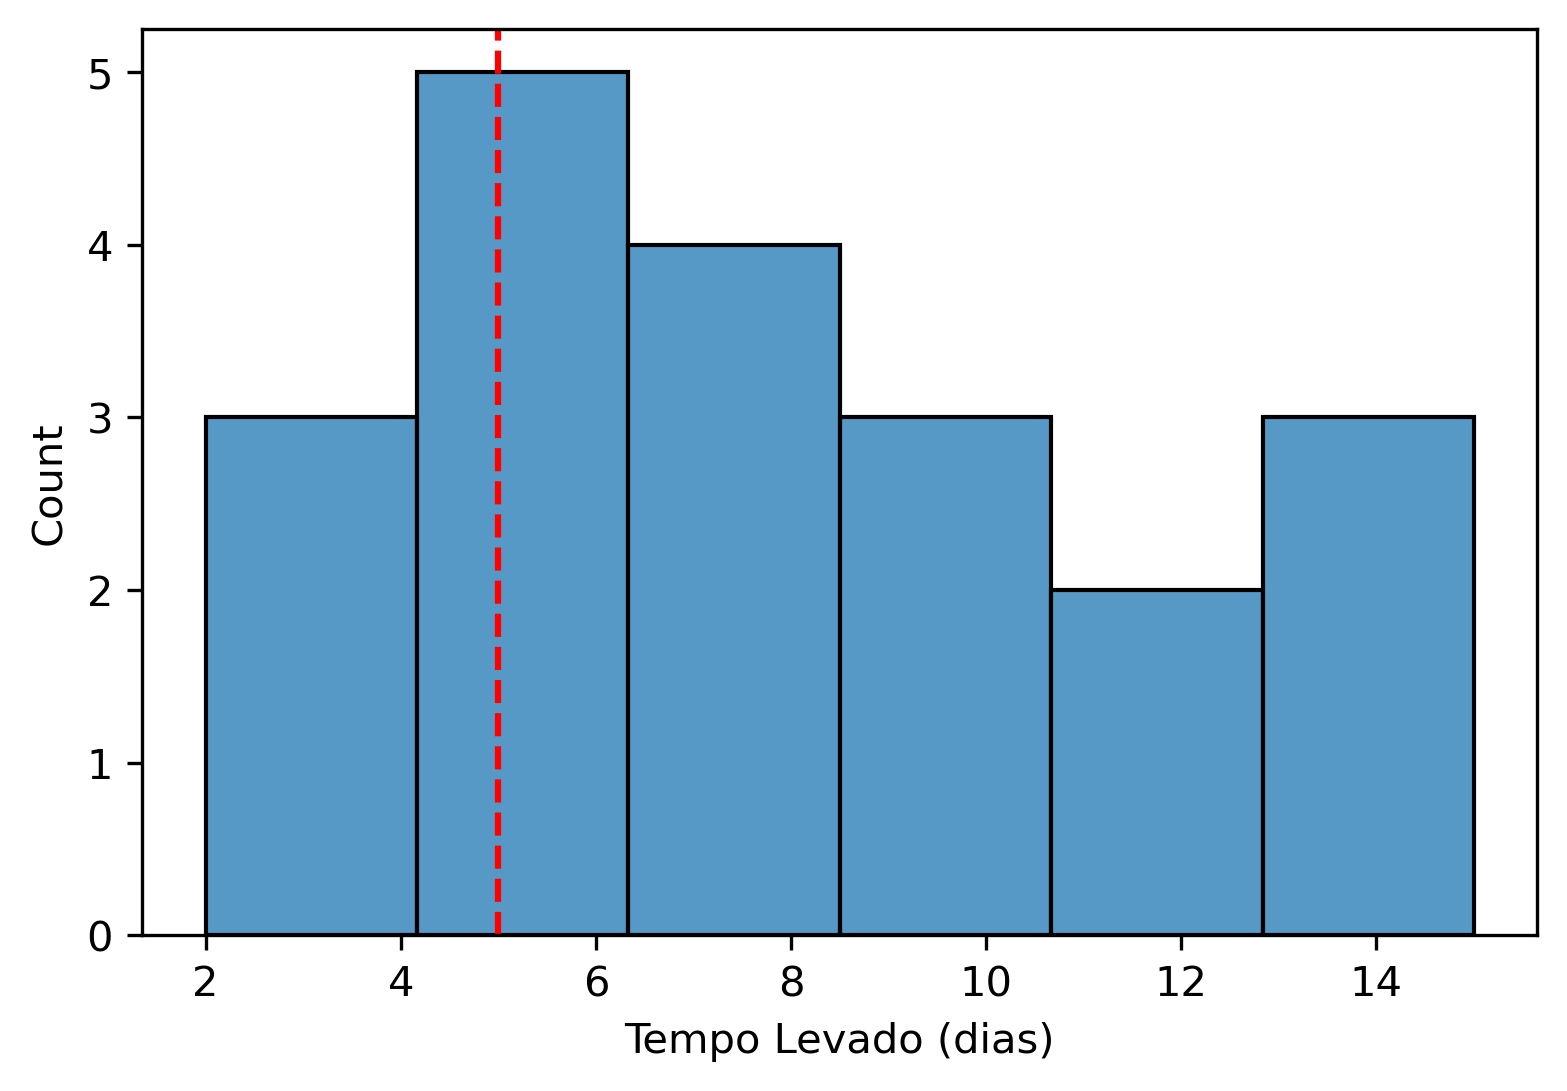

In [16]:
plt.figure(dpi=300)
sns.histplot(data=df3, x='Tempo Levado (dias)')
plt.axvline(5, ls='--', color='r')

print('Percentagem de Atraso: ',
      sum(df3['Tempo Levado (dias)'] > 5)/df3.shape[0] * 100, '%')

### 2) Ações foram tomadas, e todo o processo que envolvia a entrega das mercadorias foi alterado. Assim, para novas 20 entregas foi anotado o tempo levado para se entregar o produto. O que é possível concluir?

<span style="color:red"> Resp: As mudanças geraram uma melhoria no processo, diminuindo o tempo de entrega. Agora, a maioria das entregas era feita no prazo estabelecido. </span>

Percentagem de Atraso:  10.0 %


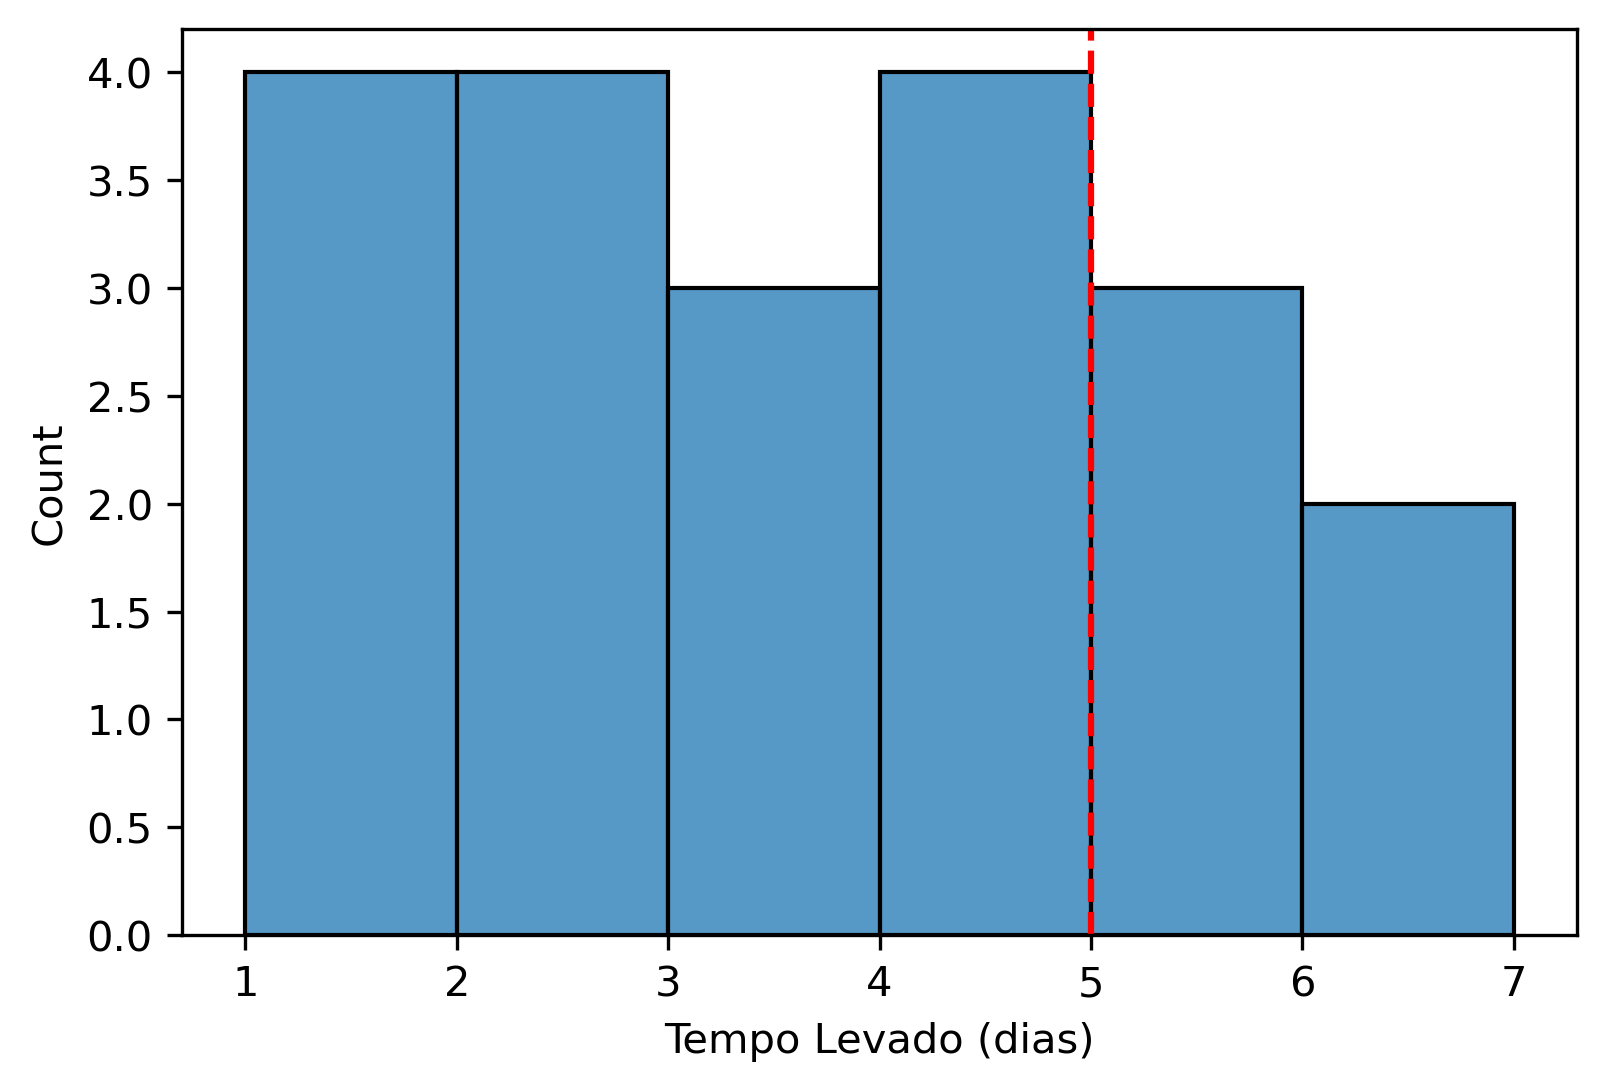

In [17]:
plt.figure(dpi=300)
sns.histplot(data=df4, x='Tempo Levado (dias)')
plt.axvline(5, ls='--', color='r')

print('Percentagem de Atraso: ',
      sum(df4['Tempo Levado (dias)'] > 5)/df4.shape[0] * 100, '%')